# Generate UMAP JUMP Pilot figures
These UMAPs were computed from sampled QC'd and feature-selected cellprofiler profiles.

## Import libraries

In [1]:

suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(arrow))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


Warning message:
“package ‘arrow’ was built under R version 4.2.3”


## Load in UMAP anomaly score file and set paths

In [2]:

# Find the root of the git repo
project_root <- normalizePath(
    system("git rev-parse --show-toplevel", intern = TRUE),
    winslash = "/",
    mustWork = TRUE
)

big_drive_dir <- file.path(project_root, "../../../../mnt", "big_drive")
umap_anomaly_path <- file.path(big_drive_dir, "umap_data", "feature_selected_sc_qc_data")
output_fig_dir <- file.path(project_root, "3.analyze_data", "visualize_umaps", "figures")
dir.create(output_fig_dir, recursive = TRUE, showWarnings = FALSE)

# Set directory and file structure
umap_path <- file.path(umap_anomaly_path, "umap_feature_selected_sc_qc_data.parquet")
umap_df <- read_parquet(umap_path)

## Set the theme for UMAP figures

In [3]:
umap_axisless_theme <- theme_bw(base_size = 16) +
    theme(
        plot.title = element_text(size = 18, face = "bold"),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        axis.title = element_text(size = 14),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.line = element_blank(),
        panel.grid = element_blank()
    )

## Create and save UMAP figure labeled by treatment type

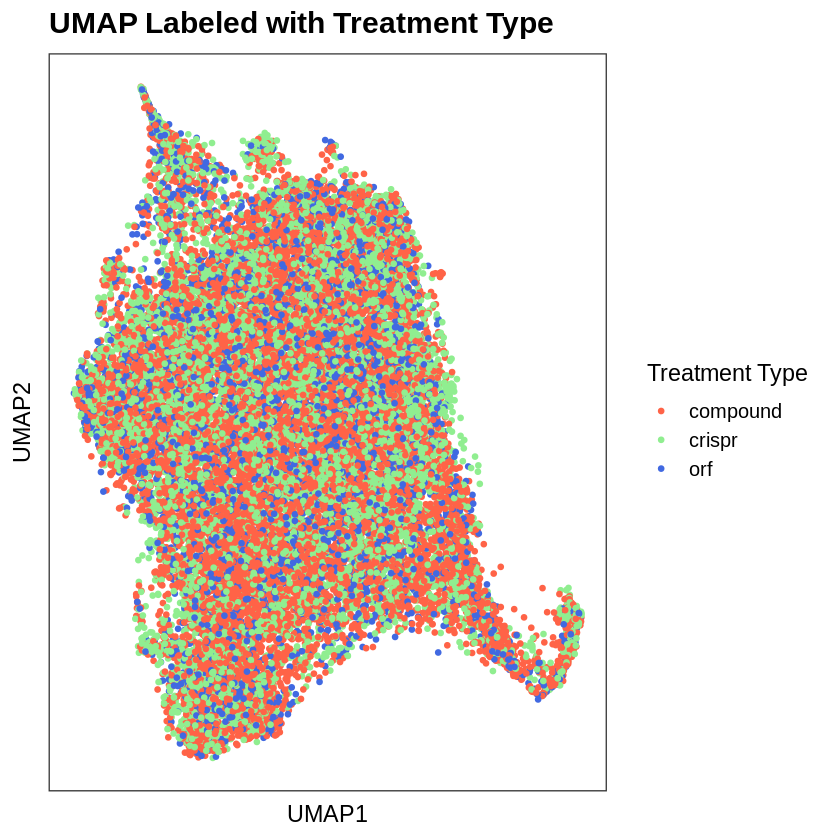

In [4]:

umap_figure <-
    ggplot(umap_df, aes(x = umap_0, y = umap_1, color = Metadata_Treatment_Type)) +
    geom_point(shape = 20, size = 2, alpha = 4) +
    scale_color_manual(
        name = "Treatment Type",
        values = c("compound" = "#FF6347", "orf" = "#4169E1", "crispr" = "#90EE90")
    ) +
    labs(title = "UMAP Labeled with Treatment Type", x = "UMAP1", y = "UMAP2") +
    umap_axisless_theme
umap_plot_fig <- file.path(output_fig_dir, "treatment_type_umap.png")

# Save the plot to a file (e.g., in PNG format)
ggsave(umap_plot_fig, umap_figure, width = 10, height = 8, dpi = 500)

umap_figure

## Create and save UMAP figure labeled with anomaly score

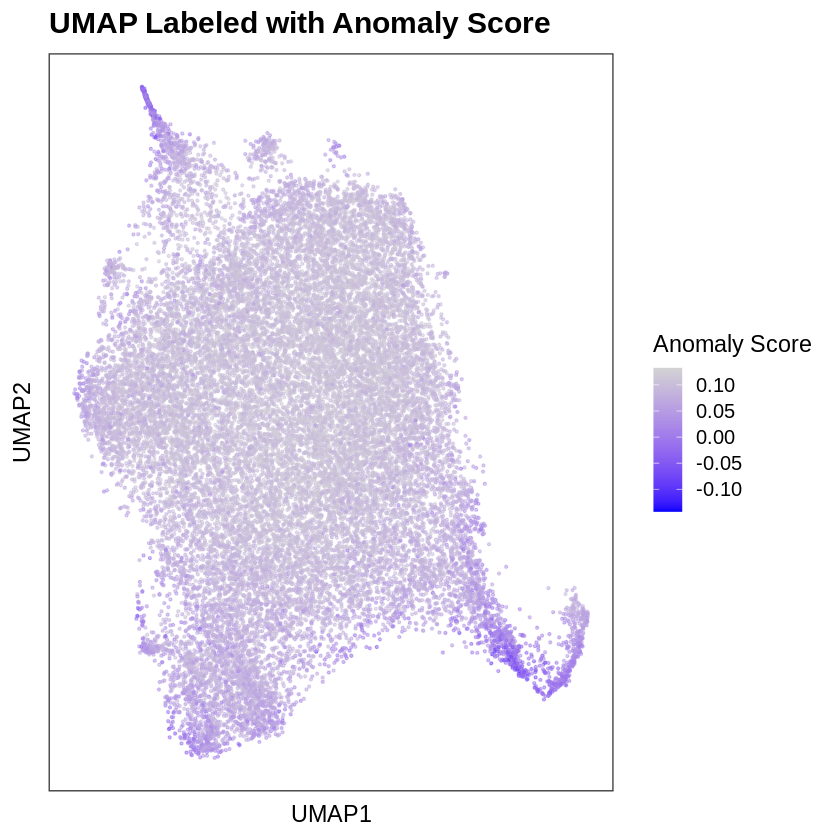

In [5]:

# Create UMAP labelled with the anomaly score as gradient
umap_figure <-
    ggplot(umap_df, aes(x = umap_0, y = umap_1, color = Result_anomaly_score)) +
    geom_point(shape = 20, size = 1, alpha = 0.5) +
    scale_color_gradient(
        low = "blue", high = "lightgrey",
        name = "Anomaly Score"
    ) +
    labs(title = "UMAP Labeled with Anomaly Score", x = "UMAP1", y = "UMAP2") +
    umap_axisless_theme

umap_plot_fig <- file.path(output_fig_dir, "anomaly_score_umap.png")

# Save the plot to a file (e.g., in PNG format)
ggsave(umap_plot_fig, umap_figure, width = 10, height = 8, dpi = 500)

umap_figure

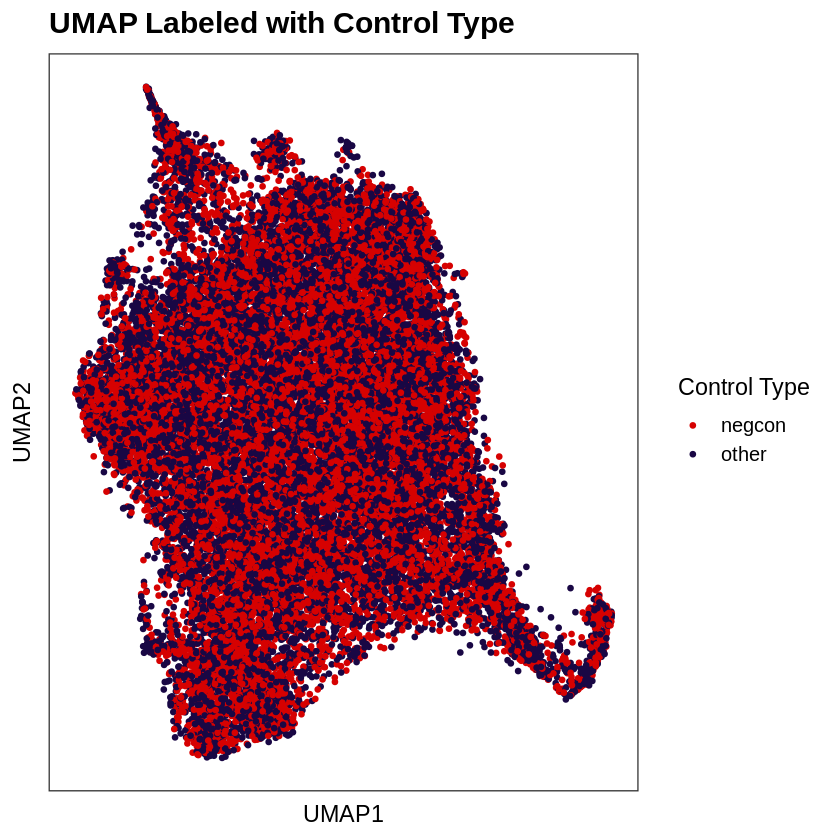

In [6]:

umap_figure <-
    ggplot(umap_df, aes(x = umap_0, y = umap_1, color = Metadata_control_type)) +
    geom_point(shape = 20, size = 2, alpha = 4) +
    scale_color_manual(
        name = "Control Type",
        values = c("other" = "#190744", "negcon" = "#d60101")
    ) +
    labs(title = "UMAP Labeled with Control Type", x = "UMAP1", y = "UMAP2") +
    umap_axisless_theme

umap_plot_fig <- file.path(output_fig_dir, "control_type_umap.png")

# Save the plot to a file (e.g., in PNG format)
ggsave(umap_plot_fig, umap_figure, width = 10, height = 8, dpi = 500)

umap_figure